===========================================================================================================================

Nama: Rizqia Dewi Annisa

Project ini dibuat guna memprediksi customers hotel yang melakukan pembatalan pesanan menggunakan Artificial Neural Network

============================================================================================================================

# **Import Libraries**

In [1]:
# Define Libraries

# library calling dataset and data
import pandas as pd
import numpy as np

# library data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# library data preprocessing
from feature_engine.outliers import Winsorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from imblearn.over_sampling import SMOTE
from scipy.stats import skew
from scipy import stats

# # Import for Phik Correlation
from phik.report import plot_correlation_matrix

# Import for Data Balancing
from imblearn.under_sampling import RandomUnderSampler

# library model definition dan training algorithm
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense

from imblearn.over_sampling import SMOTENC
from imblearn.under_sampling import ClusterCentroids

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.initializers import RandomNormal, HeNormal
from tensorflow.keras.layers import Input, Dense, Concatenate, Flatten
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# librry evaluation model algorithm
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

from joblib import dump
import time

# **Data Loading**

In [2]:
# Displays data to be used in analysis or loading from data sets
df = pd.read_csv('hotel.csv')
df

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,ID00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,ID00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,ID00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,ID00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,ID00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,ID36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,ID36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,ID36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,ID36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

## - Check Data Duplicate

In [4]:
# Check for duplicated rows
print('Number of duplicated rows = ', df.duplicated().sum())

Number of duplicated rows =  0


## - Duplicate Data

In [5]:
# Duplicate dataset sebagai main dataframe
data_duplicate = df.copy()

## - Check Cardinality

In [6]:
# Display unique items from each column
def display_unique(df):
  listUniqueItem = []
  for col in df.columns :
      listUniqueItem.append( [col, df[col].nunique(), df[col].isna().sum(), df[col].unique()])

  tableDesc = pd.DataFrame(columns=['Column Name', 'Total of Unique', 'null', 'Unique Sample'],
                      data=listUniqueItem)
  return tableDesc

In [7]:
display_unique(df)

,Column Name,Total of Unique,null,Unique Sample
0,Booking_ID,36275,0,"[ID00001, ID00002, ID00003, ID00004, ID00005, ..."
1,no_of_adults,5,0,"[2, 1, 3, 0, 4]"
2,no_of_children,6,0,"[0, 2, 1, 3, 10, 9]"
3,no_of_weekend_nights,8,0,"[1, 2, 0, 4, 3, 6, 5, 7]"
4,no_of_week_nights,18,0,"[2, 3, 1, 4, 5, 0, 10, 6, 11, 7, 15, 9, 13, 8,..."
5,type_of_meal_plan,4,0,"[Meal Plan 1, Not Selected, Meal Plan 2, Meal ..."
6,required_car_parking_space,2,0,"[0, 1]"
7,room_type_reserved,7,0,"[Room_Type 1, Room_Type 4, Room_Type 2, Room_T..."
8,lead_time,352,0,"[224, 5, 1, 211, 48, 346, 34, 83, 121, 44, 0, ..."
9,arrival_year,2,0,"[2017, 2018]"


**Insight**:
- Data Kategorikal -> type_of_meal_plan, market_segment_type, booking_status, repeated_guest, arrival_month, arrival_year, room_type_reserved, required_car_parking_space, no_of_special_requests, no_of_adults

- Data Numerikal ->

## - Check Missing Value

In [8]:
# Check null values
df_null = pd.DataFrame({'Null Values' : df.isnull().sum(),
                        'Percentage Null Values' :
                         (df.isna().sum()) / (df.shape[0]) * (100)})
df_null = df_null[df_null['Null Values']>0]
df_null.sort_values('Percentage Null Values', ascending=False)

,Null Values,Percentage Null Values


**Insight** : Dalam data tidak terdapat missing value

## - Descriptive Statistic

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.0,1.844962,0.518715,0.0,2.0,2.00,2.0,4.0
no_of_children,36275.0,0.105279,0.402648,0.0,0.0,0.00,0.0,10.0
no_of_weekend_nights,36275.0,0.810724,0.870644,0.0,0.0,1.00,2.0,7.0
no_of_week_nights,36275.0,2.204300,1.410905,0.0,1.0,2.00,3.0,17.0
required_car_parking_space,36275.0,0.030986,0.173281,0.0,0.0,0.00,0.0,1.0
lead_time,36275.0,85.232557,85.930817,0.0,17.0,57.00,126.0,443.0
arrival_year,36275.0,2017.820427,0.383836,2017.0,2018.0,2018.00,2018.0,2018.0
arrival_month,36275.0,7.423653,3.069894,1.0,5.0,8.00,10.0,12.0
arrival_date,36275.0,15.596995,8.740447,1.0,8.0,16.00,23.0,31.0
repeated_guest,36275.0,0.025637,0.158053,0.0,0.0,0.00,0.0,1.0


# **Exploratory Data Analysis (EDA)**

In [10]:
book_lead= df.groupby('booking_status')['lead_time'].mean()
print(book_lead)

booking_status
Canceled        139.215482
Not_Canceled     58.927224
Name: lead_time, dtype: float64


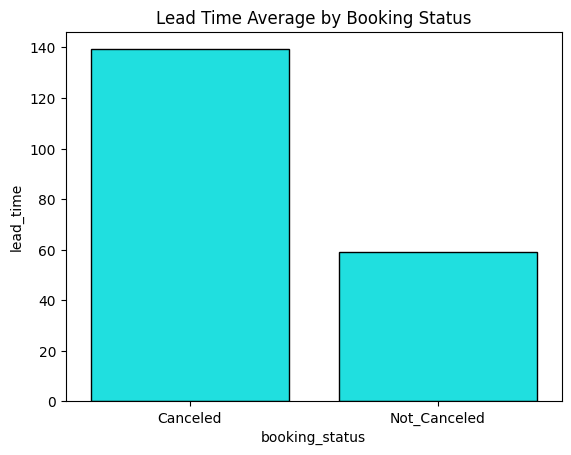

In [11]:
sns.barplot(data=book_lead, edgecolor='black', color='cyan')
plt.title('Lead Time Average by Booking Status')
plt.show()

# **Feature Engineering**

In [12]:
data_duplicate['booking_status'].value_counts()

booking_status
Not_Canceled    24390
Canceled        11885
Name: count, dtype: int64

In [13]:
data_duplicate['booking_status'] = data_duplicate['booking_status'].replace({'Not_Canceled': 0, 'Canceled': 1}).astype(int)

In [14]:
data_duplicate = data_duplicate.drop('Booking_ID',axis=1)

## - Correlation

interval columns not set, guessing: ['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests', 'booking_status']


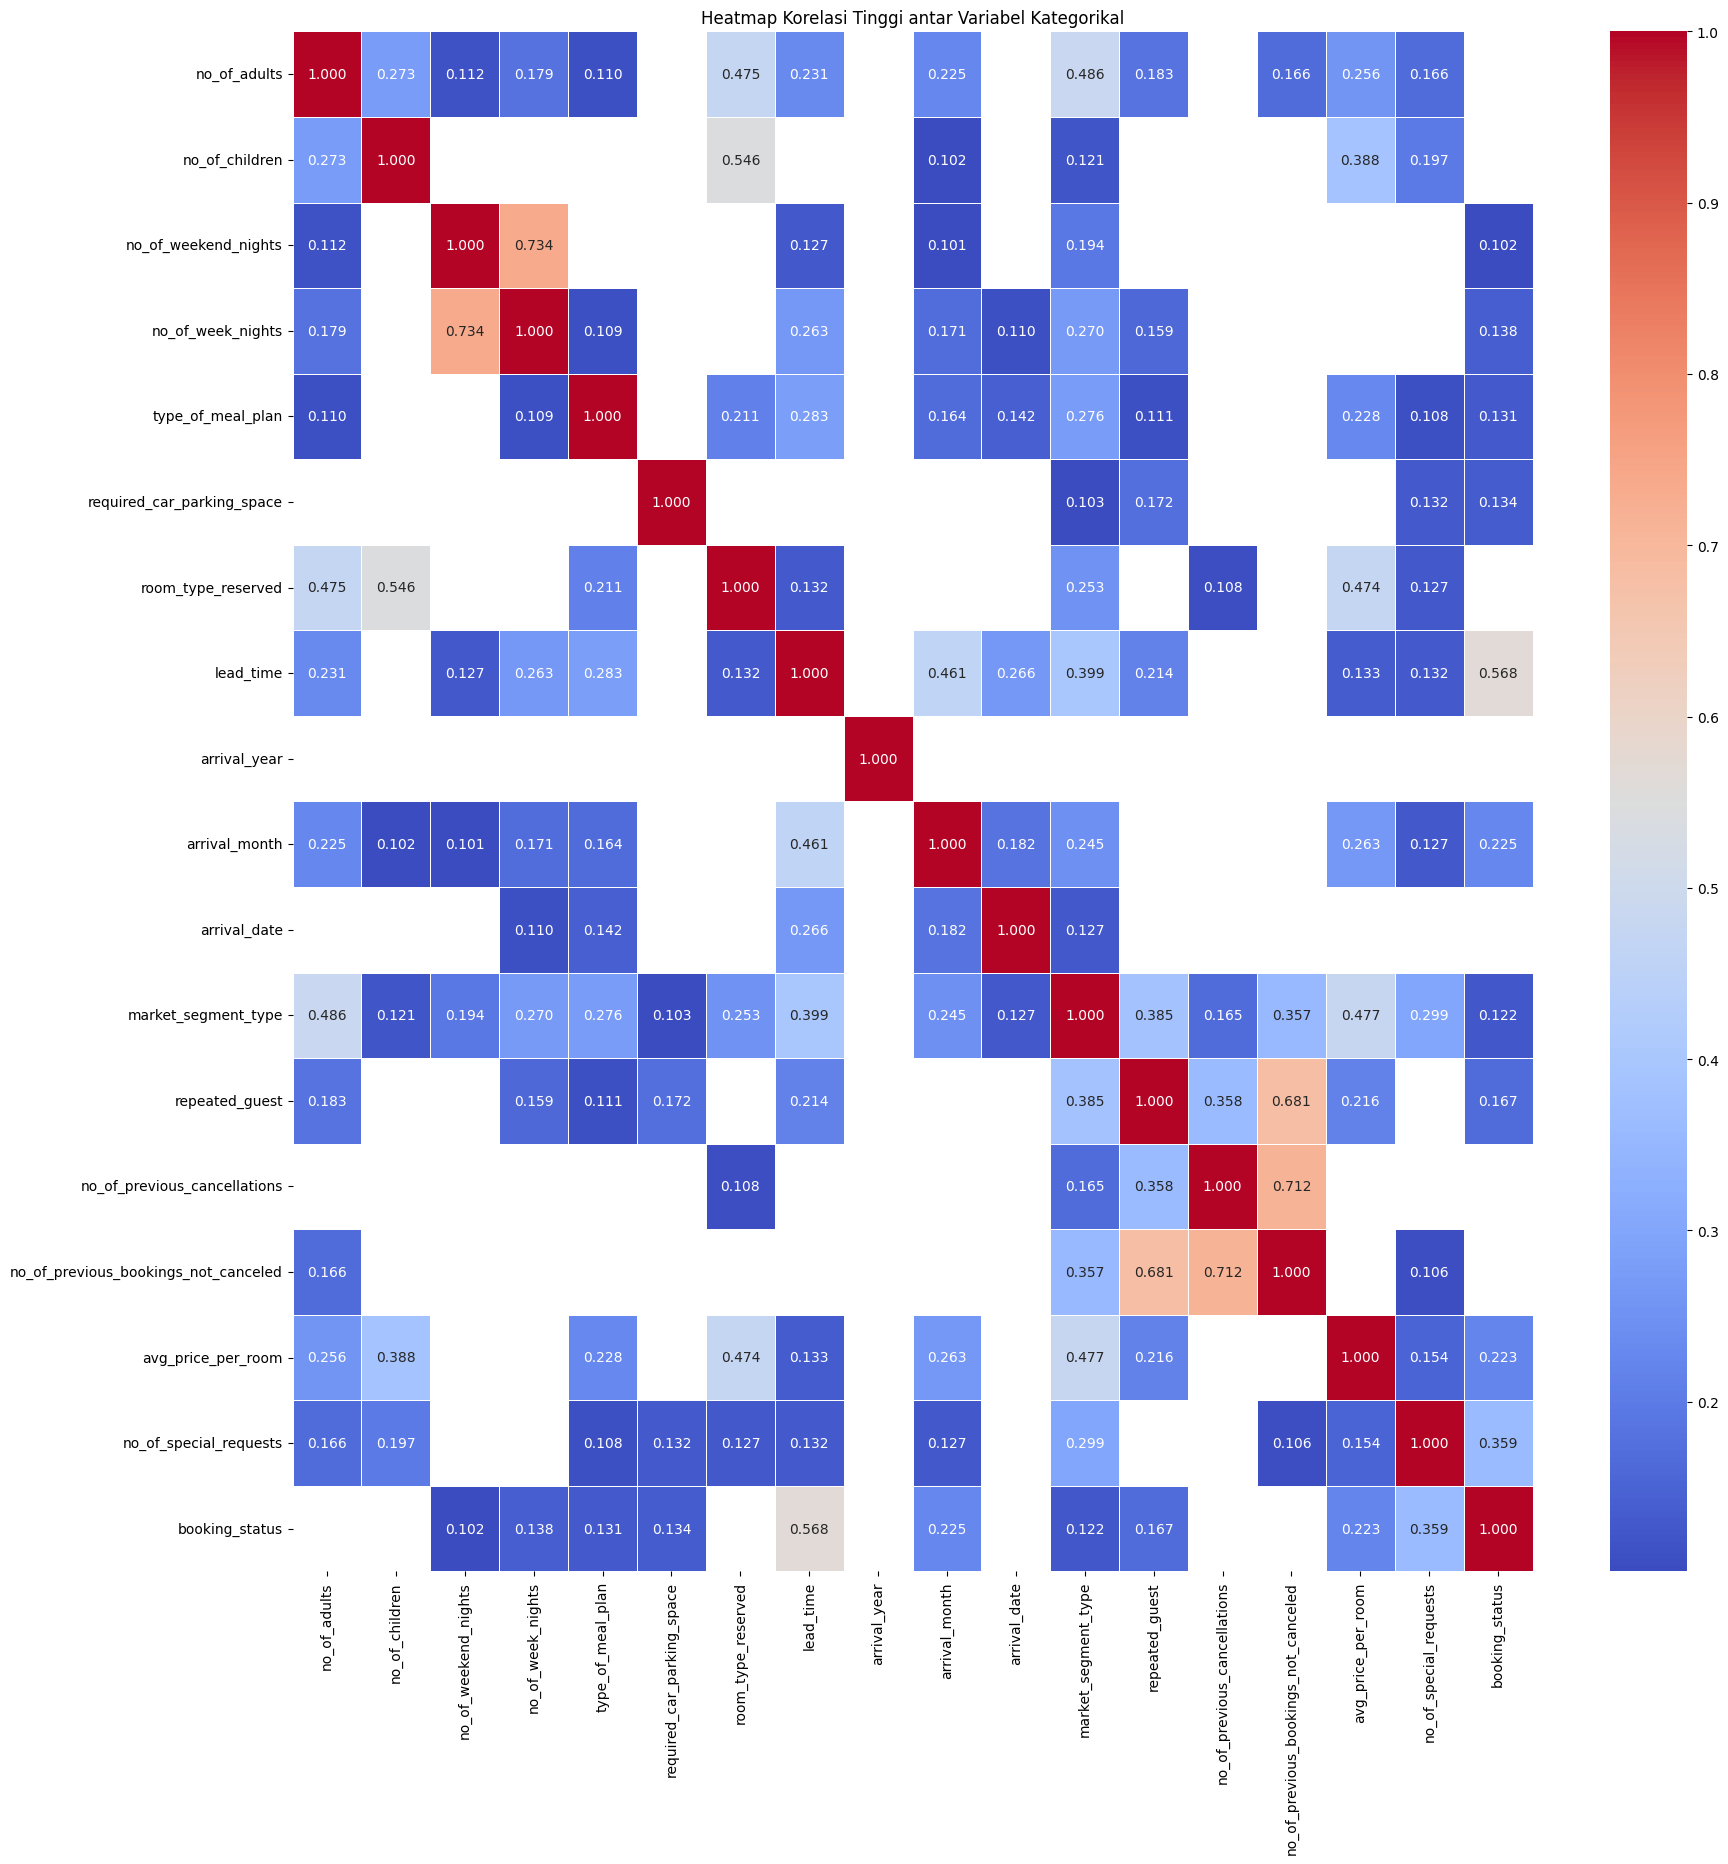

In [15]:

# See the Correlation between Features and status booking targets
# Change the features to categorical first in order to calculate the correlation of some features to the target
Correlation = data_duplicate.phik_matrix()

high_correlation = Correlation[(Correlation > 0.1) | (Correlation < -0.1)]

# Membuat heatmap untuk visualisasi korelasi tinggi
plt.figure(figsize=(20, 20))
sns.heatmap(high_correlation, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".3f")
plt.title("Heatmap Korelasi Tinggi antar Variabel Kategorikal")
plt.show()

In [16]:
final_column = data_duplicate.phik_matrix()['booking_status']>= 0.1
final_column = final_column[final_column==True]
final_column

interval columns not set, guessing: ['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests', 'booking_status']


no_of_weekend_nights          True
no_of_week_nights             True
type_of_meal_plan             True
required_car_parking_space    True
lead_time                     True
arrival_month                 True
market_segment_type           True
repeated_guest                True
avg_price_per_room            True
no_of_special_requests        True
booking_status                True
Name: booking_status, dtype: bool

## - Splitting Data

In [17]:
# Splitting between `X` and `y`

X = data_duplicate.drop('booking_status', axis=1)
y = data_duplicate['booking_status']

In [18]:
# Splitting between Train-Set, Val-Set, and Test-Set

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, random_state=24)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.15, random_state=24)

print('Train Size : ', X_train.shape)
print('Val Size   : ', X_val.shape)
print('Test Size  : ', X_test.shape)

Train Size :  (26208, 17)
Val Size   :  (4625, 17)
Test Size  :  (5442, 17)


## - Check Skewness

In [19]:
# Mencari kolom yang normal dan skew
X_train_num = X_train[['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights','required_car_parking_space',
                      'lead_time', 'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest', 'no_of_previous_cancellations',
                      'no_of_previous_bookings_not_canceled','avg_price_per_room', 'no_of_special_requests']]
X_train_cat = X_train[['type_of_meal_plan', 'room_type_reserved', 'market_segment_type']]

skewnes = []
normal = []
for i in X_train_num :
    # print(i)
    skew = X_train_num[i].skew()
    if skew < -0.5 or skew > 0.5:
        skewnes.append(i)
    else:
        normal.append(i)

print(f"kolom yang skew : {skewnes}")
print(f"kolom yang normal : {normal}")

kolom yang skew : ['no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests']
kolom yang normal : ['no_of_adults', 'arrival_month', 'arrival_date']


## - Handling Outlier

In [20]:
for i in X_train:
    print("Jumlah kategori pada variable ",i,": {}".format(len(X_train[i].unique())))

Jumlah kategori pada variable  no_of_adults : 5
Jumlah kategori pada variable  no_of_children : 5
Jumlah kategori pada variable  no_of_weekend_nights : 7
Jumlah kategori pada variable  no_of_week_nights : 18
Jumlah kategori pada variable  type_of_meal_plan : 4
Jumlah kategori pada variable  required_car_parking_space : 2
Jumlah kategori pada variable  room_type_reserved : 7
Jumlah kategori pada variable  lead_time : 346
Jumlah kategori pada variable  arrival_year : 2
Jumlah kategori pada variable  arrival_month : 12
Jumlah kategori pada variable  arrival_date : 31
Jumlah kategori pada variable  market_segment_type : 5
Jumlah kategori pada variable  repeated_guest : 2
Jumlah kategori pada variable  no_of_previous_cancellations : 8
Jumlah kategori pada variable  no_of_previous_bookings_not_canceled : 46
Jumlah kategori pada variable  avg_price_per_room : 3314
Jumlah kategori pada variable  no_of_special_requests : 6


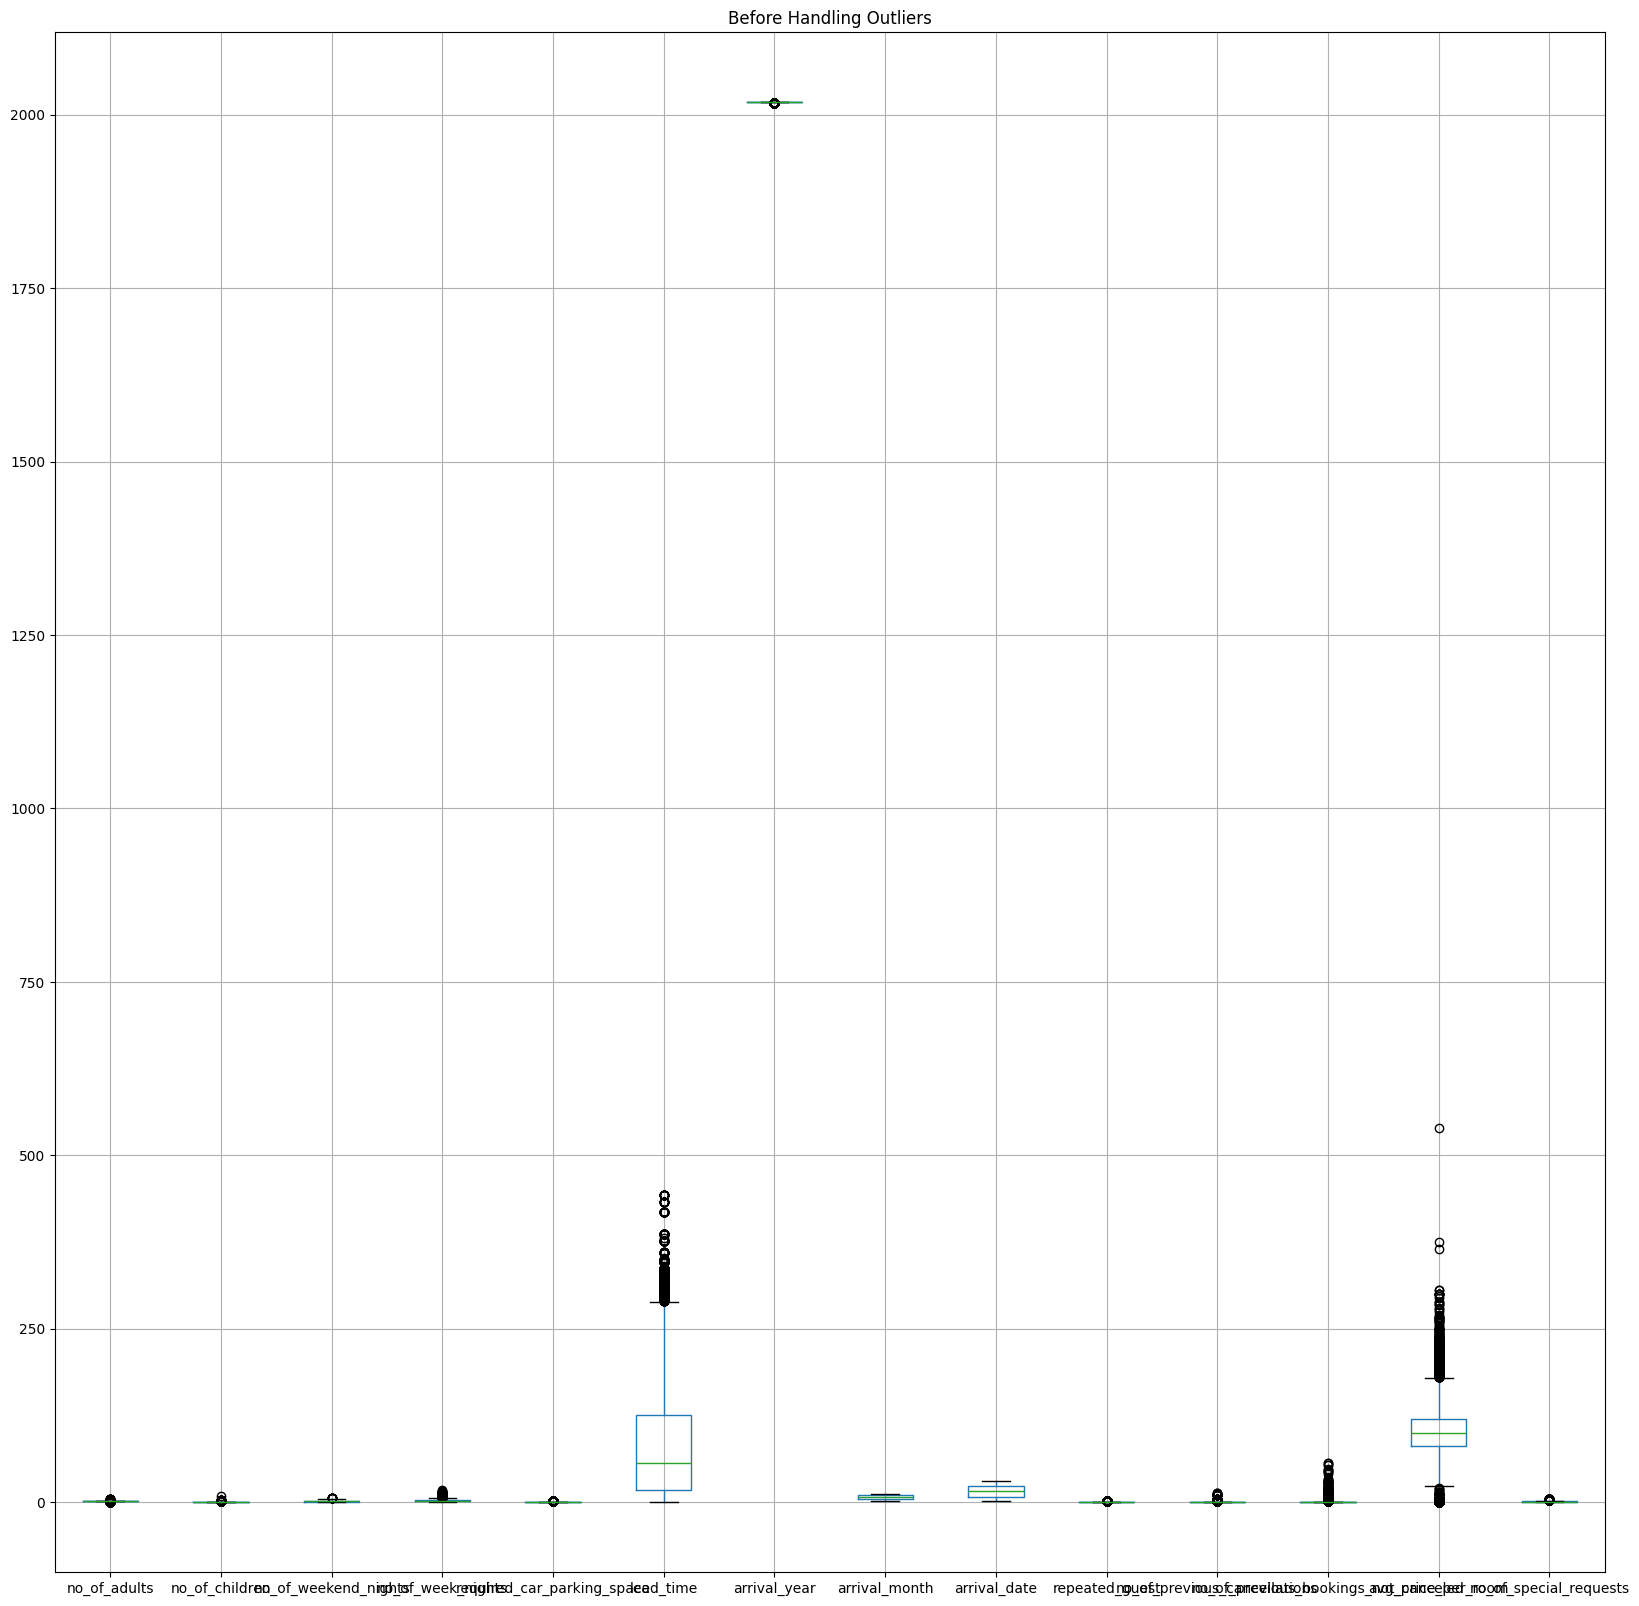

In [21]:
# Visual dari numerik Xtrain yang masih ada outlier
X_train.boxplot(figsize=(20, 20))
plt.title('Before Handling Outliers')
plt.show()

In [22]:
# handling skew
wz = Winsorizer(capping_method='iqr', tail='both', fold=1.5, variables=['no_of_week_nights', 'lead_time', 'avg_price_per_room'] )
X_train = wz.fit_transform(X_train)

# handling skew extrim
wz = Winsorizer(capping_method='gaussian', tail='both', fold=3, variables=['no_of_previous_bookings_not_canceled'] )
X_train = wz.fit_transform(X_train)

# handling normal
wz = Winsorizer(capping_method='gaussian', tail='both', fold=3, variables=['arrival_date'] )
X_train = wz.fit_transform(X_train)

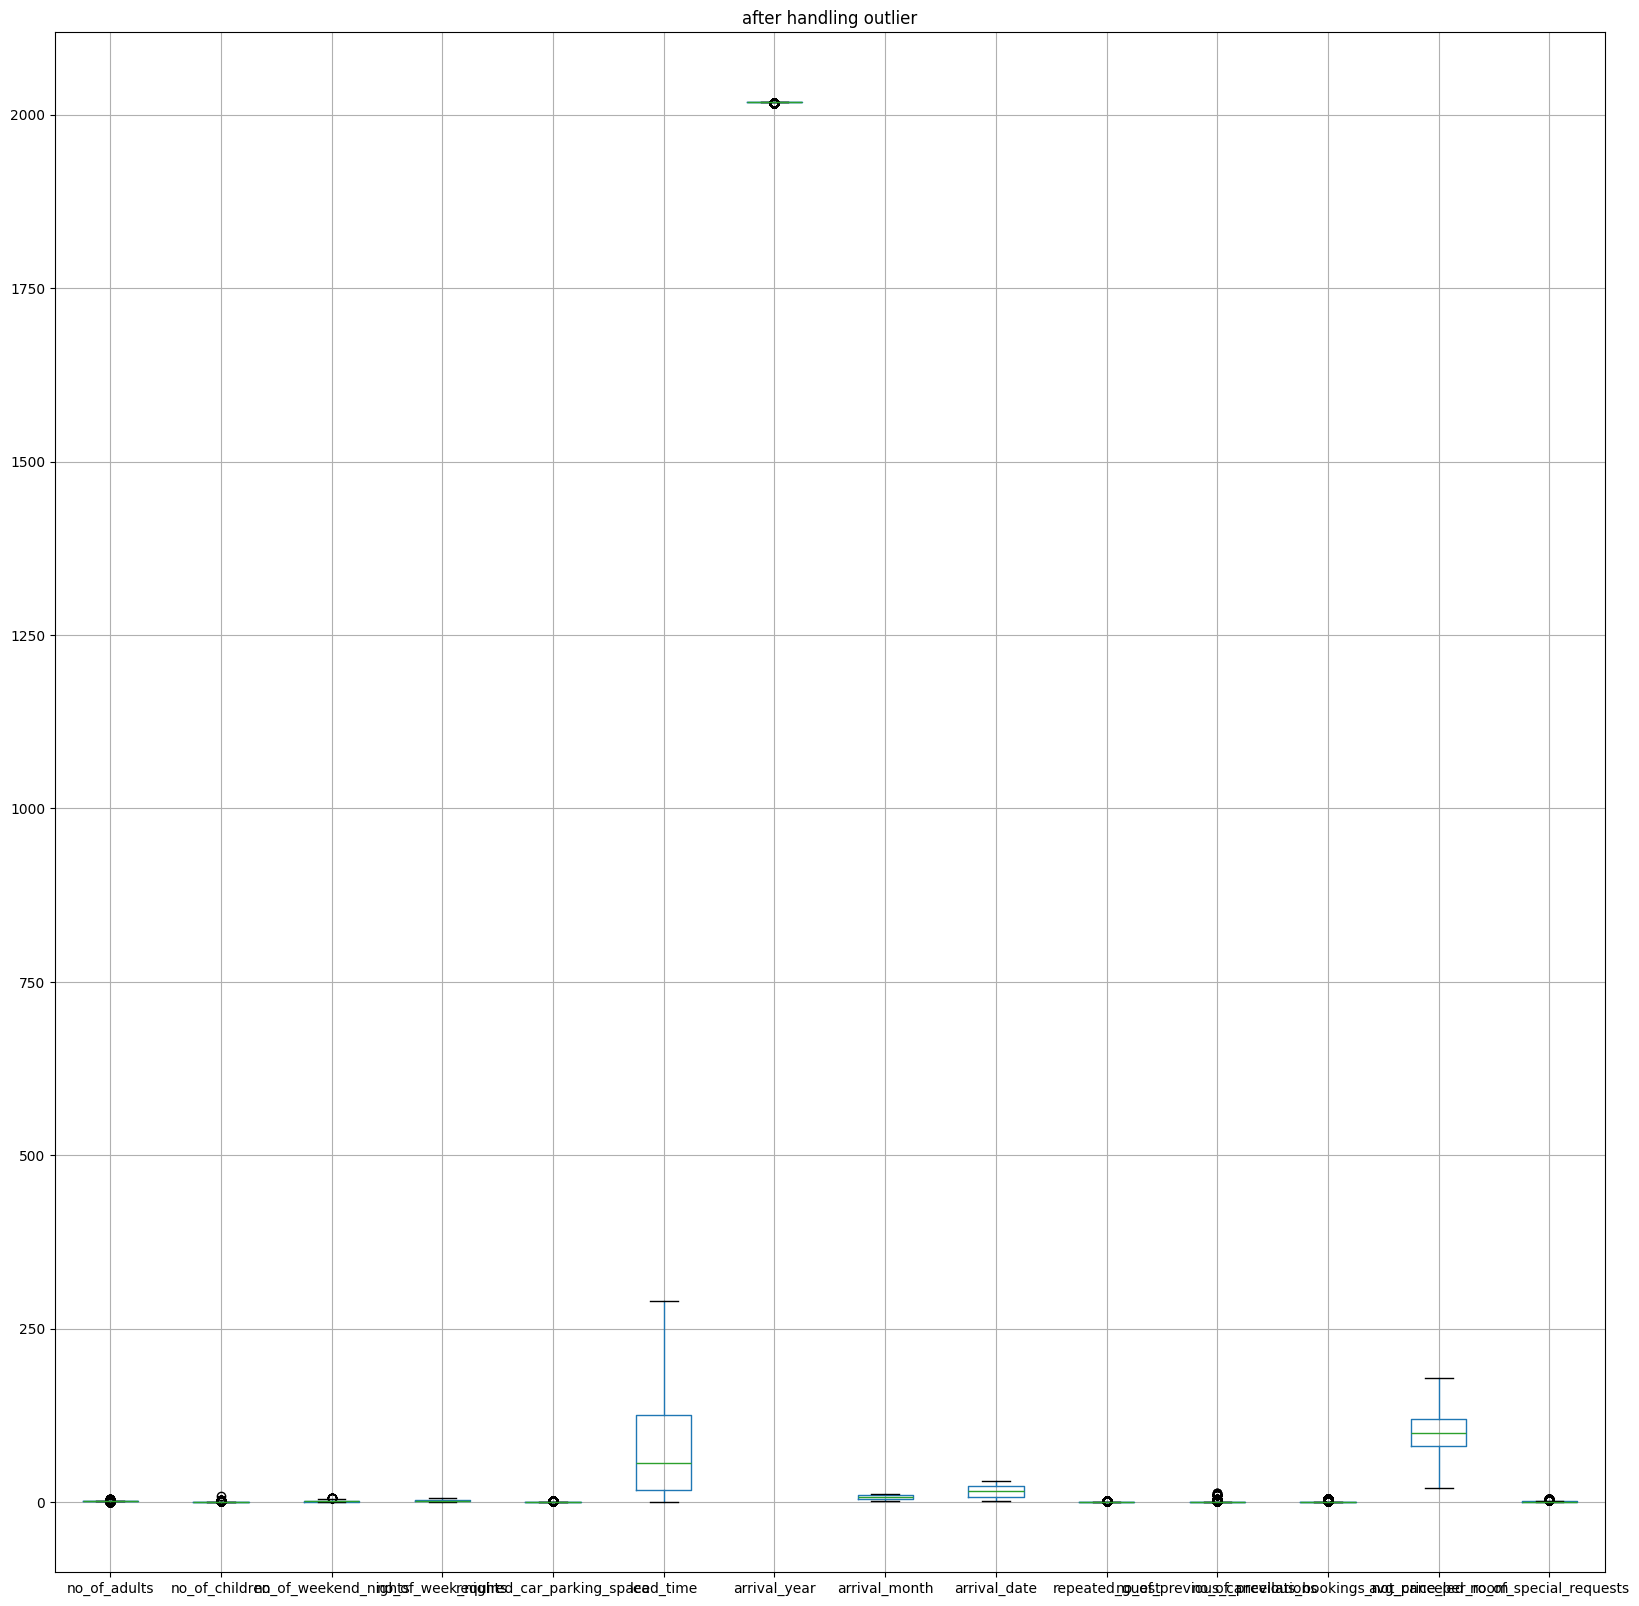

In [23]:
X_train.boxplot(figsize=(20, 20))
plt.title('after handling outlier')
plt.show()

## - Feature Selection

In [24]:
X_train = X_train[['no_of_weekend_nights','type_of_meal_plan','required_car_parking_space','lead_time','arrival_month','market_segment_type','repeated_guest','avg_price_per_room','no_of_special_requests']]
X_val = X_val[['no_of_weekend_nights','type_of_meal_plan','required_car_parking_space','lead_time','arrival_month','market_segment_type','repeated_guest','avg_price_per_room','no_of_special_requests']]
X_test = X_test[['no_of_weekend_nights','type_of_meal_plan','required_car_parking_space','lead_time','arrival_month','market_segment_type','repeated_guest','avg_price_per_room','no_of_special_requests']]

## - Balancing Data

In [25]:
X_train

,no_of_weekend_nights,type_of_meal_plan,required_car_parking_space,lead_time,arrival_month,market_segment_type,repeated_guest,avg_price_per_room,no_of_special_requests
29836,0,Meal Plan 1,0,3.0,10,Corporate,0,65.00,0
34425,0,Meal Plan 1,0,90.0,10,Offline,0,105.40,0
82,2,Not Selected,0,20.0,12,Online,0,88.00,2
33847,0,Meal Plan 1,0,30.0,6,Offline,0,140.00,0
15546,0,Meal Plan 1,1,4.0,4,Aviation,0,104.00,0
...,...,...,...,...,...,...,...,...,...
8105,2,Meal Plan 1,0,156.0,7,Online,0,111.35,2
15359,1,Meal Plan 1,0,121.0,2,Online,0,58.91,2
16892,0,Meal Plan 1,0,4.0,8,Online,0,175.00,0
20723,1,Meal Plan 1,0,45.0,11,Online,0,86.40,0


In [26]:
# Mencari persentase value y train
total_y = y_train.value_counts(normalize=False)

print("Total Value Target:")
print(total_y)

Total Value Target:
booking_status
0    17607
1     8601
Name: count, dtype: int64


In [27]:
# Mencari persentase value y train
percentage = y_train.value_counts(normalize=True) * 100

print("\\nPersentase:")
print(percentage)

\nPersentase:
booking_status
0    67.181777
1    32.818223
Name: proportion, dtype: float64


In [28]:
undersample = RandomUnderSampler()

X_train, y_train = undersample.fit_resample(X_train, y_train)
y_train.value_counts()

booking_status
0    8601
1    8601
Name: count, dtype: int64

## - Pipeline

In [29]:
X_train.columns

Index(['no_of_weekend_nights', 'type_of_meal_plan',
       'required_car_parking_space', 'lead_time', 'arrival_month',
       'market_segment_type', 'repeated_guest', 'avg_price_per_room',
       'no_of_special_requests'],
      dtype='object')

In [30]:
X_train

,no_of_weekend_nights,type_of_meal_plan,required_car_parking_space,lead_time,arrival_month,market_segment_type,repeated_guest,avg_price_per_room,no_of_special_requests
26510,0,Meal Plan 1,0,2.0,12,Corporate,0,65.00,0
21215,0,Meal Plan 1,0,0.0,12,Offline,1,65.00,2
5056,1,Meal Plan 1,0,55.0,1,Online,0,58.94,1
20133,0,Meal Plan 2,0,63.0,9,Offline,0,56.00,0
34350,2,Meal Plan 1,0,76.0,4,Online,0,87.30,1
...,...,...,...,...,...,...,...,...,...
22921,2,Meal Plan 1,0,256.0,10,Online,0,103.70,0
4774,1,Meal Plan 1,0,76.0,3,Online,0,59.50,0
8156,1,Meal Plan 1,0,289.5,10,Offline,0,80.00,0
8105,2,Meal Plan 1,0,156.0,7,Online,0,111.35,2


In [31]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17202 entries, 26510 to 20723
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   no_of_weekend_nights        17202 non-null  int64  
 1   type_of_meal_plan           17202 non-null  object 
 2   required_car_parking_space  17202 non-null  int64  
 3   lead_time                   17202 non-null  float64
 4   arrival_month               17202 non-null  int64  
 5   market_segment_type         17202 non-null  object 
 6   repeated_guest              17202 non-null  int64  
 7   avg_price_per_room          17202 non-null  float64
 8   no_of_special_requests      17202 non-null  int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 1.3+ MB


In [32]:
# Get Numerical Columns and Categorical Columns

num_columns = X_train.select_dtypes(include=np.number).columns.tolist()
cat_columns = X_train.select_dtypes(include=['object']).columns.tolist()

print('Numerical Columns : ', num_columns)
print('Categorical Columns : ', cat_columns)

Numerical Columns :  ['no_of_weekend_nights', 'required_car_parking_space', 'lead_time', 'arrival_month', 'repeated_guest', 'avg_price_per_room', 'no_of_special_requests']
Categorical Columns :  ['type_of_meal_plan', 'market_segment_type']


In [33]:
# Create A Pipeline

num_pipeline = make_pipeline(SimpleImputer(strategy='median'),
                             StandardScaler())

cat_pipeline = make_pipeline(OneHotEncoder())

preprocessing = ColumnTransformer([
    ('pipe_num', num_pipeline, num_columns),
    ('pipe_cat', cat_pipeline, cat_columns)
])

In [34]:
preprocessing

ColumnTransformer(transformers=[('pipe_num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['no_of_weekend_nights',
                                  'required_car_parking_space', 'lead_time',
                                  'arrival_month', 'repeated_guest',
                                  'avg_price_per_room',
                                  'no_of_special_requests']),
                                ('pipe_cat',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder())]),
                                 ['type_of_meal_plan', 'market_segment_type'])])

In [35]:
# Fit and Transform

X_train = preprocessing.fit_transform(X_train)
X_val = preprocessing.transform(X_val)
X_test = preprocessing.transform(X_test)
X_train.shape

(17202, 16)

# **Model Definition**

In [36]:
seed = 30
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

initializer = RandomNormal(mean=0, stddev=1, seed=seed)
loss_function = tf.keras.losses.BinaryCrossentropy()
optimizer = tf.keras.optimizers.Adam()

## - ANN Sequential API

In [37]:
# Create ANN Model
model_sequential = Sequential([
    Input(shape=(16,), name='input-layer'),  # Change here
    Dense(20, activation='relu', kernel_initializer=initializer, name='hidden-layer-1'),
    Dense(30, activation='relu', kernel_initializer=initializer, name='hidden-layer-2'),
    Dense(40, activation='relu', kernel_initializer=initializer, name='hidden-layer-3'),
    Dense(30, activation='relu', kernel_initializer=initializer, name='hidden-layer-4'),
    Dense(20, activation='relu', kernel_initializer=initializer, name='hidden-layer-5'),
    Dense(1, activation="sigmoid", kernel_initializer=initializer, name='output-layer')
])

# Compile the model
model_sequential.compile(loss=loss_function, optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])

# Print the summary
model_sequential.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden-layer-1 (Dense)      (None, 20)                340       
                                                                 
 hidden-layer-2 (Dense)      (None, 30)                630       
                                                                 
 hidden-layer-3 (Dense)      (None, 40)                1240      
                                                                 
 hidden-layer-4 (Dense)      (None, 30)                1230      
                                                                 
 hidden-layer-5 (Dense)      (None, 20)                620       
                                                                 
 output-layer (Dense)        (None, 1)                 21        
                                                                 
Total params: 4081 (15.94 KB)
Trainable params: 4081 (15

In [38]:
tf.keras.utils.plot_model(model_sequential, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


## - ANN Functional API

In [39]:
# functional API
input_layer= tf.keras.Input(shape=(X_train.shape[1:]),name='input_layer')

hidden_1= Dense(30, activation='relu', name='hidden_1')(input_layer)
hidden_2= Dense(30, activation='relu', name='hidden_2')(hidden_1)
hidden_3= Dense(10, activation='relu', name='hidden_3')(hidden_2)
concat= tf.keras.layers.concatenate([input_layer,hidden_3])

output_layer= Dense(1, activation='sigmoid', name='output_layer')(concat)

model_func= Model(inputs=input_layer,
                  outputs=output_layer)

# model_func.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# Compile
model_func.compile(loss=loss_function,
                         optimizer='adam',
                         metrics=['accuracy'])
model_func.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_layer (InputLayer)    [(None, 16)]                 0         []                            
                                                                                                  
 hidden_1 (Dense)            (None, 30)                   510       ['input_layer[0][0]']         
                                                                                                  
 hidden_2 (Dense)            (None, 30)                   930       ['hidden_1[0][0]']            
                                                                                                  
 hidden_3 (Dense)            (None, 10)                   310       ['hidden_2[0][0]']            
                                                                                             

In [40]:
tf.keras.utils.plot_model(model_func, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


# **Model Training**

## - ANN Sequential API

In [41]:
callbacks1= [
    EarlyStopping(monitor='val_loss', patience= 3, restore_best_weights=True),
    ModelCheckpoint('model_best.hdf5', monitor='val_loss', save_best_only=True)
]

In [42]:
#training model
batch=32

history_ann_seq= model_sequential.fit(X_train, y_train,
                        validation_data= (X_val,y_val),
                         batch_size= batch,
                         epochs= 100,
                         callbacks= callbacks1
                         )

Epoch 1/100


127/538 [======>.......................] - ETA: 0s - loss: 181.3439 - accuracy: 0.5795

538/538 [==============================] - 3s 3ms/step - loss: 72.9546 - accuracy: 0.6597 - val_loss: 29.1571 - val_accuracy: 0.7101
Epoch 2/100
538/538 [==============================] - 2s 3ms/step - loss: 19.8312 - accuracy: 0.7151 - val_loss: 17.5772 - val_accuracy: 0.7172
Epoch 3/100
538/538 [==============================] - 1s 2ms/step - loss: 12.1603 - accuracy: 0.7350 - val_loss: 12.5146 - val_accuracy: 0.7282
Epoch 4/100
538/538 [==============================] - 1s 2ms/step - loss: 8.6805 - accuracy: 0.7458 - val_loss: 9.1248 - val_accuracy: 0.7501
Epoch 5/100
538/538 [==============================] - 1s 2ms/step - loss: 6.7383 - accuracy: 0.7517 - val_loss: 7.8691 - val_accuracy: 0.7414
Epoch 6/100
538/538 [==============================] - 1s 2ms/step - loss: 5.3085 - accuracy: 0.7571 - val_loss: 6.2518 - val_accuracy: 0.7717
Epoch 7/100
538/538 [==============================] - 1s 2ms/step - loss: 4.4916 - accuracy: 0.7651 - val_loss: 5.4169 - val_accuracy: 0.7438
Epoch

## - ANN Functional API

In [43]:
callbacks2= [
    EarlyStopping(monitor='val_loss', patience= 3, restore_best_weights=True),
    ModelCheckpoint('model_best2.hdf5', monitor='val_loss', save_best_only=True)
]

In [44]:
#training model
batch=32

history_ann_func= model_func.fit(X_train, y_train,
                         validation_data= (X_val,y_val),
                         batch_size= batch,
                         epochs= 100,
                         callbacks= callbacks2
                         )

Epoch 1/100


538/538 [==============================] - 2s 2ms/step - loss: 0.4992 - accuracy: 0.7393 - val_loss: 0.4518 - val_accuracy: 0.7749
Epoch 2/100
538/538 [==============================] - 1s 2ms/step - loss: 0.4356 - accuracy: 0.7918 - val_loss: 0.4383 - val_accuracy: 0.7868
Epoch 3/100
538/538 [==============================] - 1s 3ms/step - loss: 0.4270 - accuracy: 0.7942 - val_loss: 0.4355 - val_accuracy: 0.7881
Epoch 4/100
538/538 [==============================] - 1s 3ms/step - loss: 0.4188 - accuracy: 0.7988 - val_loss: 0.4128 - val_accuracy: 0.8132
Epoch 5/100
538/538 [==============================] - 1s 2ms/step - loss: 0.4129 - accuracy: 0.8003 - val_loss: 0.4415 - val_accuracy: 0.7875
Epoch 6/100
538/538 [==============================] - 1s 2ms/step - loss: 0.4076 - accuracy: 0.8065 - val_loss: 0.4264 - val_accuracy: 0.7948
Epoch 7/100
538/538 [==============================] - 1s 2ms/step - loss: 0.4017 - accuracy: 0.8066 - val_loss: 0.4505 - val_accuracy: 0.7702


# **Model Evaluation**

In [45]:
def performance_check(model, X, y):
  display_labels =['Not_Canceled', 'Canceled']
  y_pred = model.predict(X)
  predictions = np.where(y_pred>= 0.5, 1, 0)

  cm = confusion_matrix(y, predictions)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels)
  disp.plot(cmap=plt.cm.Blues)
  plt.show()
  print(classification_report(y, predictions, target_names=display_labels))


## - ANN Sequential API

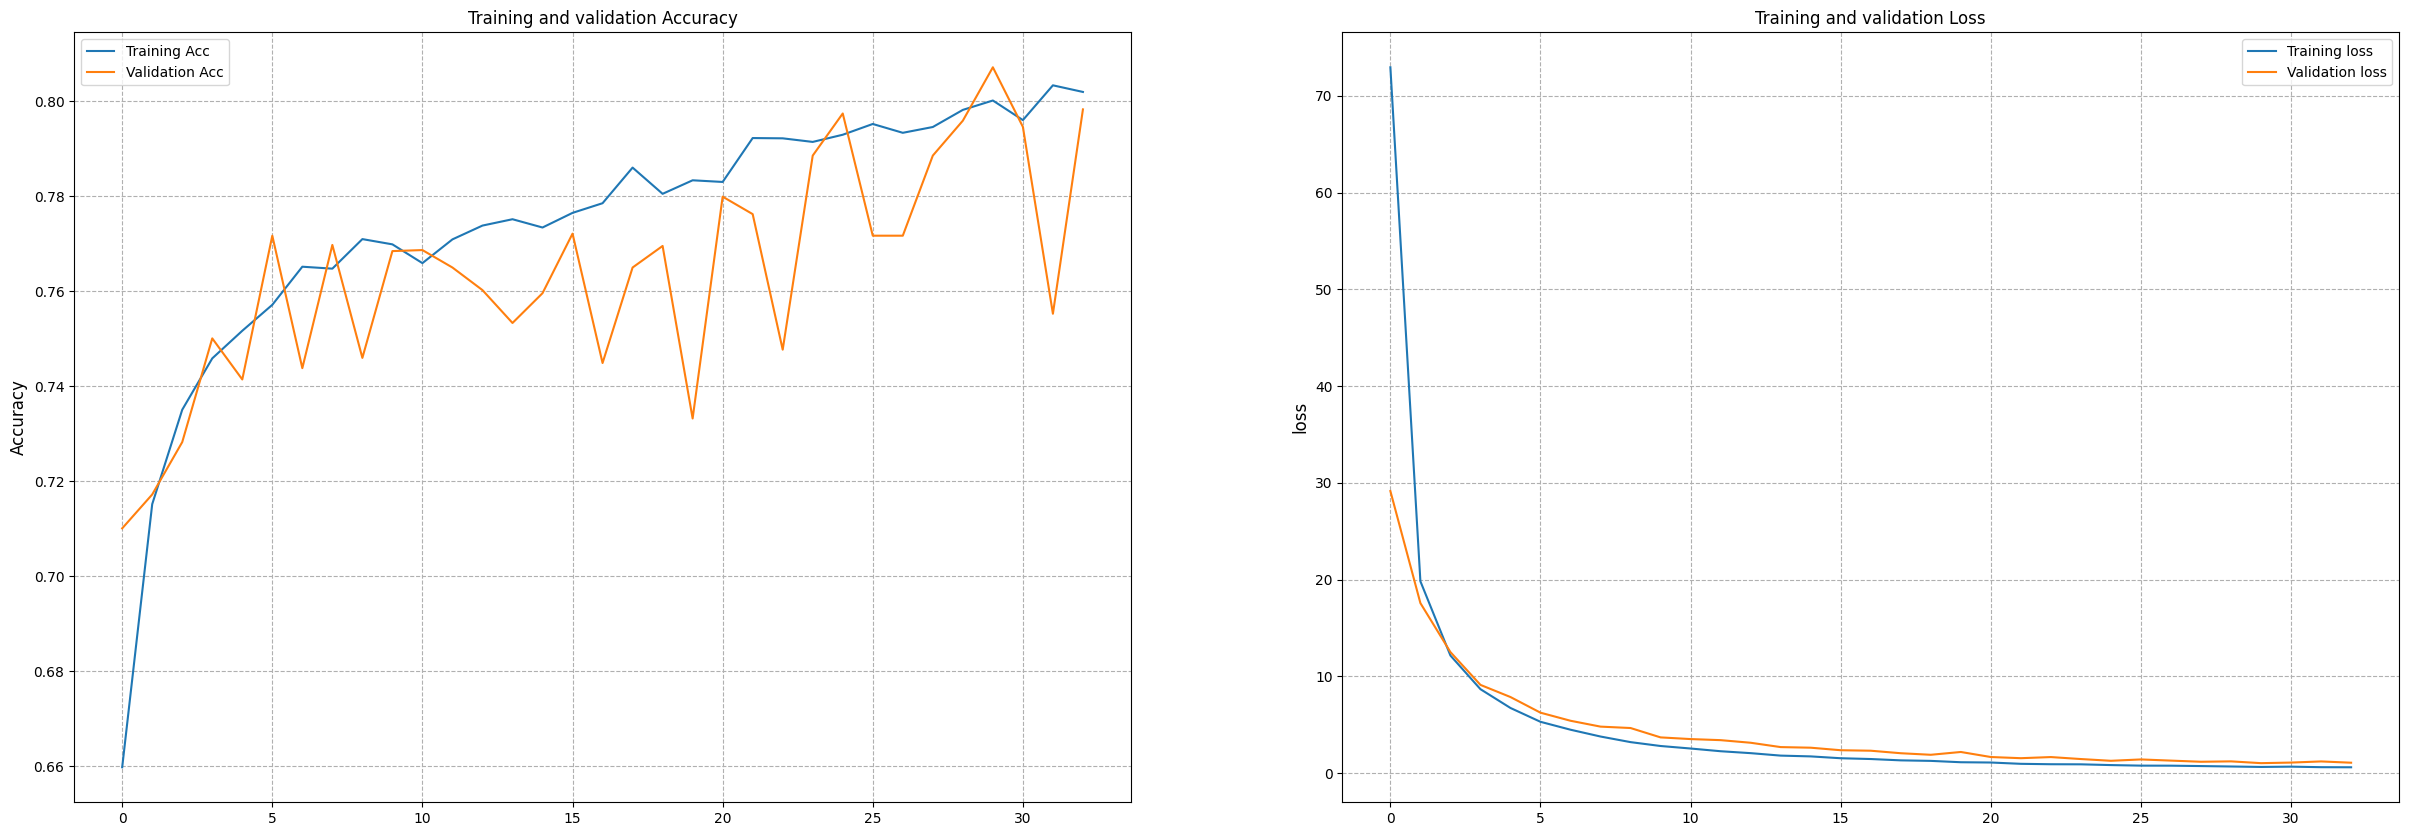

In [46]:
fig,ax= plt.subplots(1,2 , figsize=(30,10))

plt.subplot(1,2,1)
plt.title('Training and validation Accuracy', fontsize=12)
plt.plot(history_ann_seq.history['accuracy'], label='Training Acc')
plt.plot(history_ann_seq.history['val_accuracy'], label='Validation Acc')
plt.ylabel('Accuracy', fontsize=12)
plt.legend()
plt.grid(linestyle='--')

plt.subplot(1,2,2)
plt.title('Training and validation Loss', fontsize=12)
plt.plot(history_ann_seq.history['loss'], label='Training loss')
plt.plot(history_ann_seq.history['val_loss'], label='Validation loss')
plt.ylabel('loss', fontsize=12)
plt.legend()
plt.grid(linestyle='--')
plt.show()

171/171 [==============================] - 0s 1ms/step


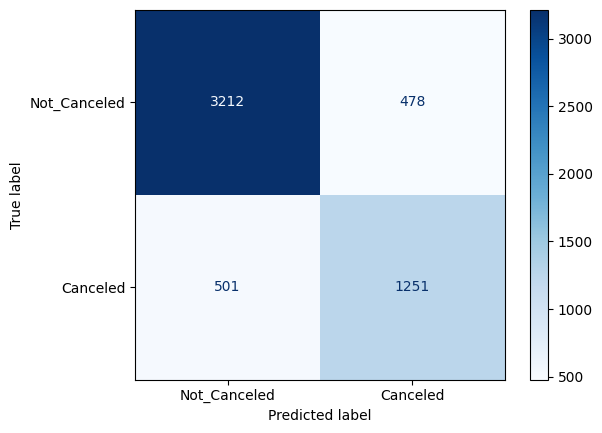

              precision    recall  f1-score   support

Not_Canceled       0.87      0.87      0.87      3690
    Canceled       0.72      0.71      0.72      1752

    accuracy                           0.82      5442
   macro avg       0.79      0.79      0.79      5442
weighted avg       0.82      0.82      0.82      5442



In [47]:
# calling function
performance_check(model_sequential, X_test, y_test)

## - ANN Functional API

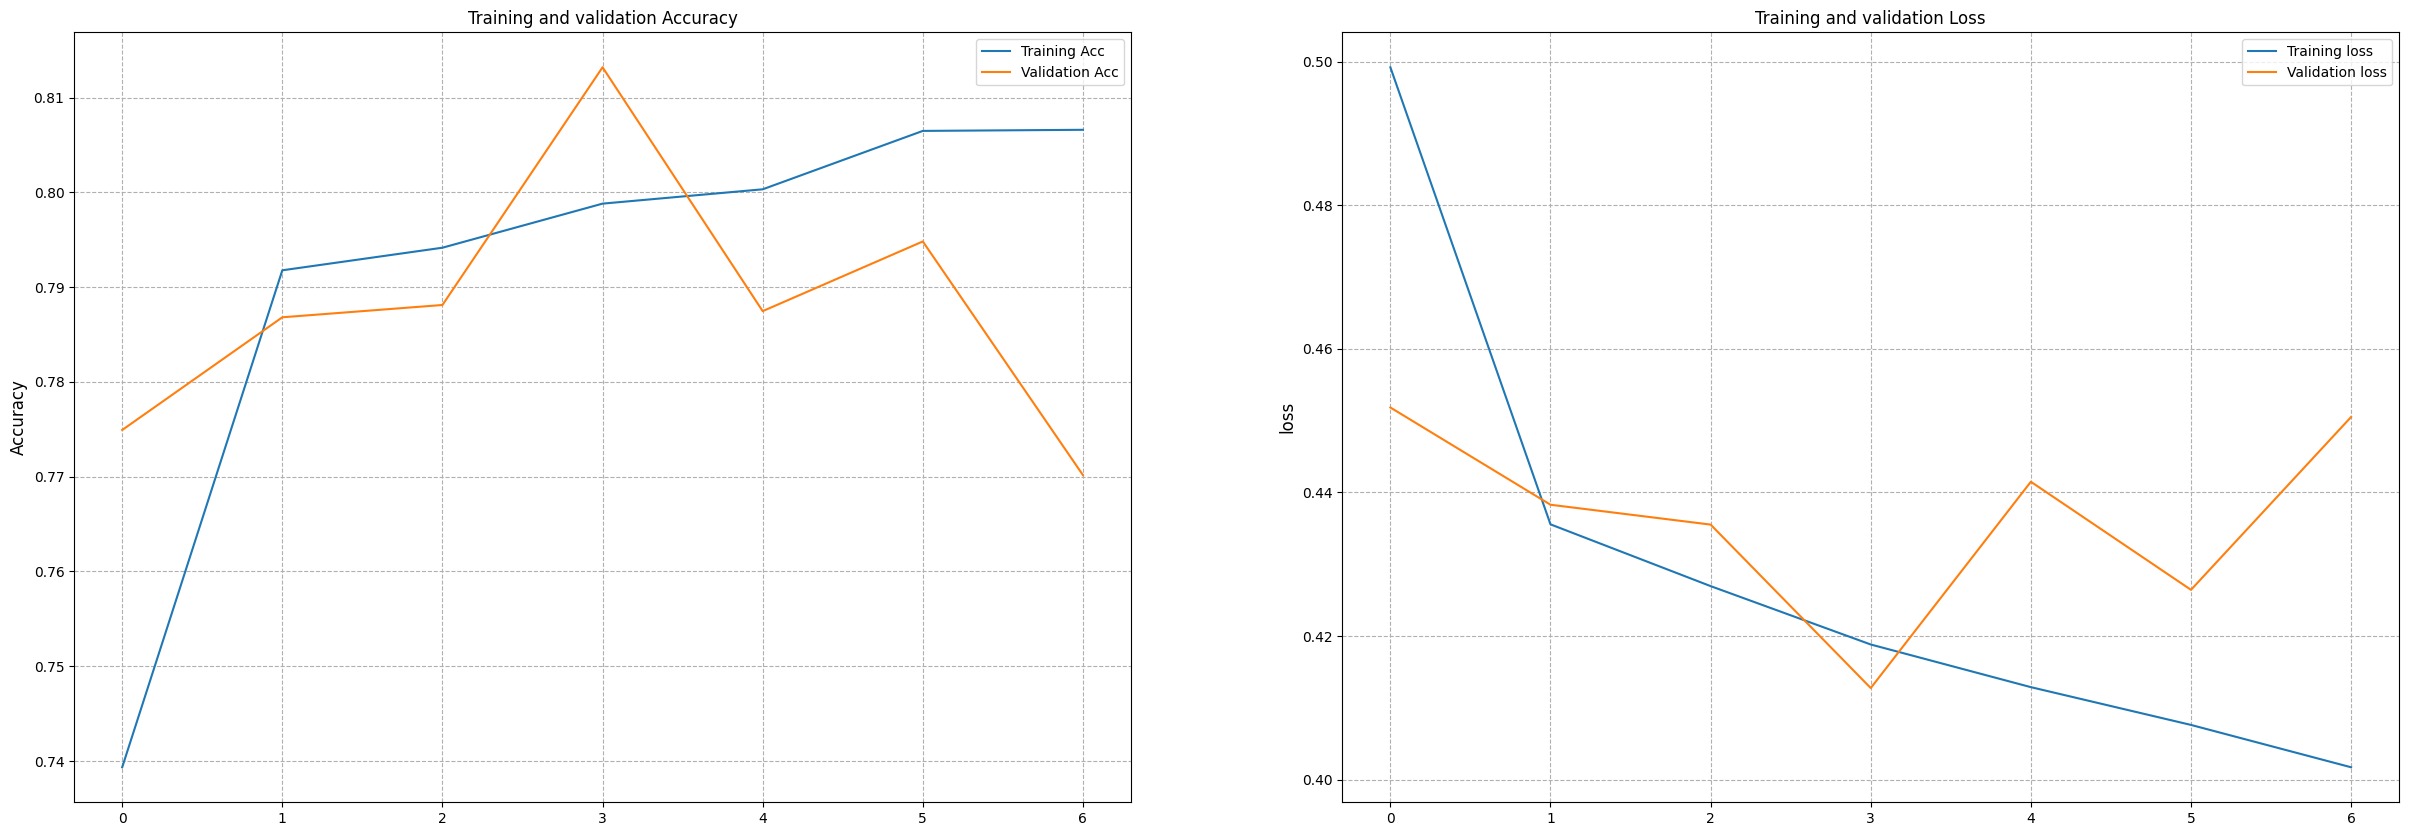

In [48]:
fig,ax= plt.subplots(1,2 , figsize=(30,10))

plt.subplot(1,2,1)
plt.title('Training and validation Accuracy', fontsize=12)
plt.plot(history_ann_func.history['accuracy'], label='Training Acc')
plt.plot(history_ann_func.history['val_accuracy'], label='Validation Acc')
plt.ylabel('Accuracy', fontsize=12)
plt.legend()
plt.grid(linestyle='--')

plt.subplot(1,2,2)
plt.title('Training and validation Loss', fontsize=12)
plt.plot(history_ann_func.history['loss'], label='Training loss')
plt.plot(history_ann_func.history['val_loss'], label='Validation loss')
plt.ylabel('loss', fontsize=12)
plt.legend()
plt.grid(linestyle='--')
plt.show()

171/171 [==============================] - 0s 1ms/step


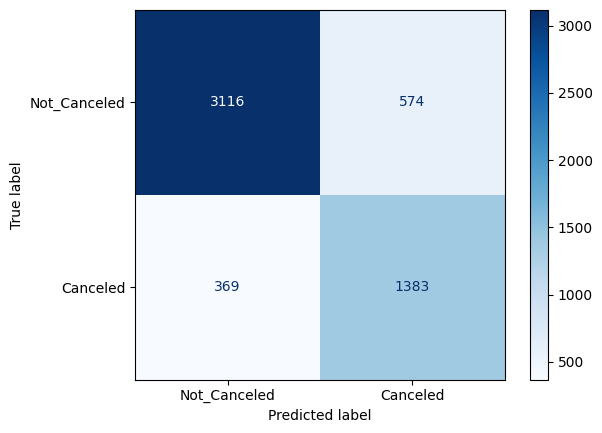

              precision    recall  f1-score   support

Not_Canceled       0.89      0.84      0.87      3690
    Canceled       0.71      0.79      0.75      1752

    accuracy                           0.83      5442
   macro avg       0.80      0.82      0.81      5442
weighted avg       0.83      0.83      0.83      5442



In [52]:
# calling function
performance_check(model_func, X_test, y_test)

**Insight**: model memiliki nilai accuracy yang lebih tinggi dibandingkan model ANN sequential, sehingga model ini merupakan model yang terbaik.

# **Model Saving**

In [50]:
# saving
dump(preprocessing, 'preprocess.joblib')
model_func.save('best_model.keras')

# **Kesimpulan**